<a href="https://colab.research.google.com/github/M0315G/PyTorch-Basics/blob/main/Section1%20-%20Getting%20Started%20with%20PyTorch/1.4-Loading_data_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Loading data in PyTorch**

To do Machine Learinig you need data, and there are three concepts to master here:

- Dataset
- Dataloader
- Transforms 

Initially, let's use pandas to read the CSV file to create a dataset

In [9]:
import torch
import pandas as pd
from torch.utils.data import Dataset
torch.__version__

'1.8.1+cu101'

In [10]:
class IrisDataset(Dataset):

  def __init__(self):
    # Load the data
    self.data = pandas.read_csv('./Iris.csv')

  def __len__(self):
    # how much data do we have
    return len(self.data)

  def __getitem__(self, idx):
    # Return the tuple at specified index
    # Arguments:
    #       idx {int} -- data at this position
    return self.data.iloc[idx]

Create an instance of this dataset

In [ ]:
iris = IrisDataset()

# Getting the length
len(iris)

# Getiing the data
iris[0]

Now, there is a small issue, when doing training of a model, we need a tensor and right now we have a named tuple.

---

Thus we need to transform it

In [11]:
class TensorIrisDataset(IrisDataset):

  def __getitem__(self, idx):
    # Get a single sample that is
    #    {values:, label: }

    sample = super().__getitem__(idx)
    return {
        'tensor': torch.tensor(
            [sample.SepalLengthCm,
             sample.SepalWidthCm,
             sample.PetalLengthCm,
             sample.PetalWidthCm]
        ),
        'label': sample.Species
    }

Check it out

In [ ]:
tensors = TensorIrisDataset()

# Getting the length
len(tensors)

# Getting a single training example
tensors[0]

Moving forward, in Machine Learning training always takes place in batches, thus PyTorch has a very convenient loader that can take a dataset and turn it into batches so you can iterate

In [12]:
from torch.utils.data import DataLoader

In [ ]:
loader = DataLoader(tensors, batch_size=16, shuffle=True)
for batch in loader:
  print(batch)

And there's even a parallel posibility

In [ ]:
parallel_loader = Dataloader(tensors, batch_size=16, shuffle=True, num_workers=4)
for batch in parallel_loader:
  print(batch)

Also, there are many predefined datasets in torchvision

In [13]:
import torchvision
import matplotlib.pyplot as plt

In [14]:
# Lists the datasets in torchvision library
dir(torchvision.datasets)

['CIFAR10',
 'CIFAR100',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'DatasetFolder',
 'EMNIST',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'HMDB51',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'Kinetics400',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SVHN',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'caltech',
 'celeba',
 'cifar',
 'cityscapes',
 'coco',
 'fakedata',
 'flickr',
 'folder',
 'hmdb51',
 'imagenet',
 'kinetics',
 'lsun',
 'mnist',
 'omniglot',
 'phototour',
 'places365',
 'sbd',
 'sbu',
 'semeion',
 'stl10',
 'svhn',
 'ucf101',
 'usps',
 'utils',
 'video_utils',
 'vision',
 'voc',
 'widerface']

In [15]:
cifar = torchvision.datasets.CIFAR10('./var', download=True)
cifar[0]


Extracting ./var/cifar-10-python.tar.gz to ./var


(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FD81313DFD0>, 6)

Loading the image

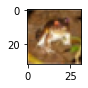

In [17]:
fig = plt.figure(figsize=(1,1))
sub = fig.add_subplot(111)
sub.imshow(cifar[0][0])

Now, that's a frog, but we need a tensor of a frog.

So, that's where transforms come in.
Tranforms are built in to torchvision and are objects that implement __call__ can change the data

In [18]:
from torchvision import transforms

In [20]:
pipeline = transforms.Compose([transforms.ToTensor()])

cifar_tr = torchvision.datasets.CIFAR10('./var', transform=pipeline)

In [21]:
cifar_tr[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,